In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

# The Goal: Converting more casual riders to members

# The Task: To provide data insights to better understand the difference between casual and member behavours so that the marketing team can better target their campaign. 

This data analysis is done in Python Jupyter Notebook on the Kaggle website. 
Python was choosen due to my familiarity of the language and its ease of use with the large variety of data analysis libraries available. 
However, with python in-memory processes, memory (RAM) might be a constraint. Thus, working with giant datasets would be challenging. Each month's pandas dataframe after augmentation and cleaning takes about 50MB, so its not too big. 

In [2]:
df = pd.read_csv('/kaggle/input/cyclists/202403-divvy-tripdata/202403-divvy-tripdata.csv')

In [3]:
df.shape

(301687, 13)

In [4]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,301687.000000,301687.000000,301291.000000,301291.000000
mean,41.900193,-87.646736,41.900595,-87.646933
std,0.045687,0.027216,0.045820,0.027379
min,41.648501,-87.841110,41.630000,-87.870000
25%,41.880000,-87.660000,41.880000,-87.660274
50%,41.895634,-87.643320,41.895769,-87.643353
75%,41.928773,-87.629912,41.929143,-87.629912
max,42.070000,-87.528232,42.080000,-87.528232


In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,64FBE3BAED5F29E6,electric_bike,2024-03-05 18:33:11,2024-03-05 18:51:48,NaN,NaN,NaN,NaN,41.94,-87.65,41.96,-87.65,member
1,9991629435C5E20E,electric_bike,2024-03-06 17:15:14,2024-03-06 17:16:04,NaN,NaN,NaN,NaN,41.91,-87.64,41.91,-87.64,member
2,E5C9FECD5B71BEBD,electric_bike,2024-03-06 17:16:36,2024-03-06 17:19:28,NaN,NaN,NaN,NaN,41.91,-87.64,41.92,-87.64,member
3,4CEA3EC8906DAEA8,electric_bike,2024-03-03 22:55:54,2024-03-03 22:58:08,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.63,member
4,77266B408503C55F,electric_bike,2024-03-17 11:15:18,2024-03-17 11:31:18,NaN,NaN,NaN,NaN,41.93,-87.70,41.93,-87.72,member


In [6]:
mem = df["member_casual"].value_counts().iloc[0]
cas = df["member_casual"].value_counts().iloc[1] 

In [7]:
total = mem + cas
print(round(mem/total * 100, 0), round(cas/total*100, 0))

73.0 27.0


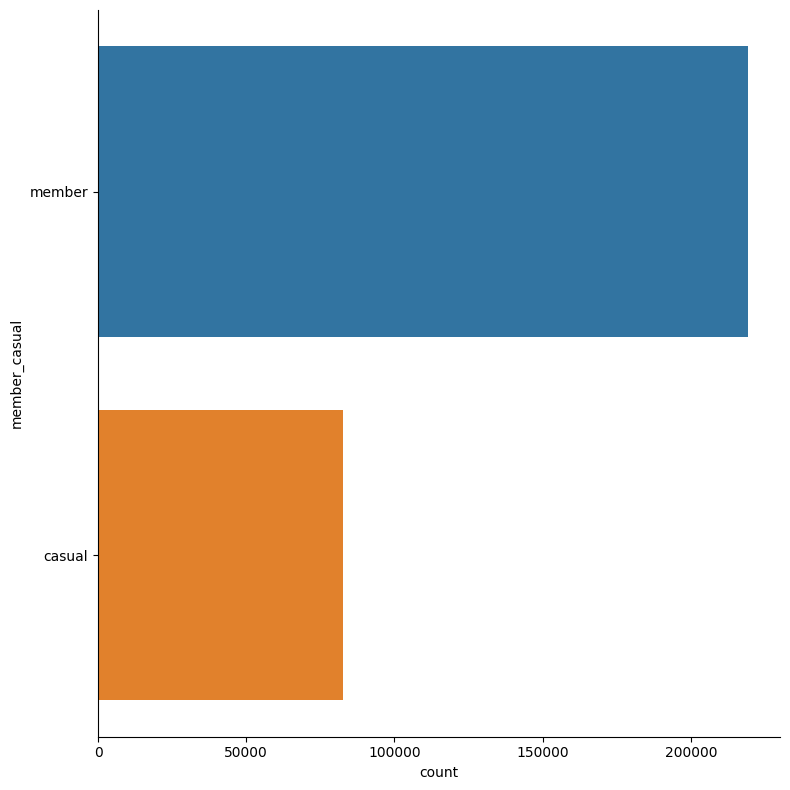

In [8]:
sb.catplot(y = "member_casual", data = df, kind = "count", height = 8)

# Finding aggregate of member-casual uses over the 12 months 
For each dataset, the member_casual data is aggregated into counts and percentages. After which, they are combined into a single dataframe for analysis. 

In [9]:
def category_stats(df, category_col):
    # Calculate counts
    counts = df[category_col].value_counts()
    
    # Calculate percentages
    percentages = df[category_col].value_counts(normalize=True) * 100
    
    # Combine counts and percentages into a DataFrame
    stats_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    
    return stats_df

In [10]:
category_col = 'member_casual'
list_of_dfs = []  

for x in range(4,10):
    df = pd.read_csv(f"/kaggle/input/cyclists/20230{x}-divvy-tripdata/20230{x}-divvy-tripdata.csv")
    list_of_dfs.append(df)
for x in range(10,13):
    df = pd.read_csv(f"/kaggle/input/cyclists/2023{x}-divvy-tripdata/2023{x}-divvy-tripdata.csv")
    list_of_dfs.append(df)
for x in range(1,4):
    df = pd.read_csv(f"/kaggle/input/cyclists/20240{x}-divvy-tripdata/20240{x}-divvy-tripdata.csv")
    list_of_dfs.append(df)
    
# List to hold all stats DataFrames
all_stats = []

# Process each DataFrame
for df in list_of_dfs:
    stats_df = category_stats(df, category_col)
    all_stats.append(stats_df)

In [11]:
# Concatenate all statistics DataFrames
final_stats_df = pd.concat(all_stats, keys=[f'Month{i+1}' for i in range(len(list_of_dfs))])

In [12]:
print(final_stats_df)

                        Count  Percentage
        member_casual                    
Month1  member         279305   65.473874
        casual         147285   34.526126
Month2  member         370646   61.281325
        casual         234181   38.718675
Month3  member         418388   58.140291
        casual         301230   41.859709
Month4  member         436292   56.834755
        casual         331358   43.165245
Month5  member         460563   59.682153
        casual         311130   40.317847
Month6  member         404736   60.737337
        casual         261635   39.262663
Month7  member         360042   67.032822
        casual         177071   32.967178
Month8  member         264126   72.858727
        casual          98392   27.141273
Month9  member         172401   76.939658
        casual          51672   23.060342
Month10 member         120413   83.116247
        casual          24460   16.883753
Month11 member         176001   78.866215
        casual          47163   21

In [13]:
final_stats_df.to_csv('monthly_counts.csv')

In [14]:
df_reset = final_stats_df.reset_index()
filtered_df = df_reset[df_reset['member_casual'] == 'member']

In [15]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 22
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   level_0        12 non-null     object 
 1   member_casual  12 non-null     object 
 2   Count          12 non-null     int64  
 3   Percentage     12 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 480.0+ bytes


In [16]:
prepared_df = filtered_df[['level_0', 'Count']]

# Plotting the graph of members-casual counts and percentages over 12 months

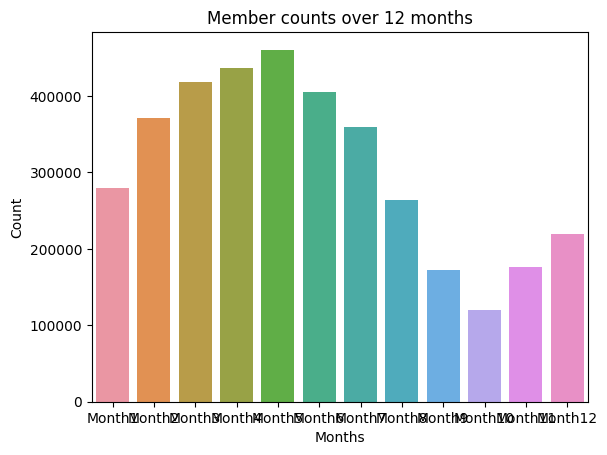

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming 'prepared_df' is already defined and loaded
sb.barplot(x='level_0', y='Count', data=prepared_df)

# Adding labels and title
plt.xlabel('Months')  # Change 'Category' to your actual x-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Member counts over 12 months')  # Title of the plot

plt.show()


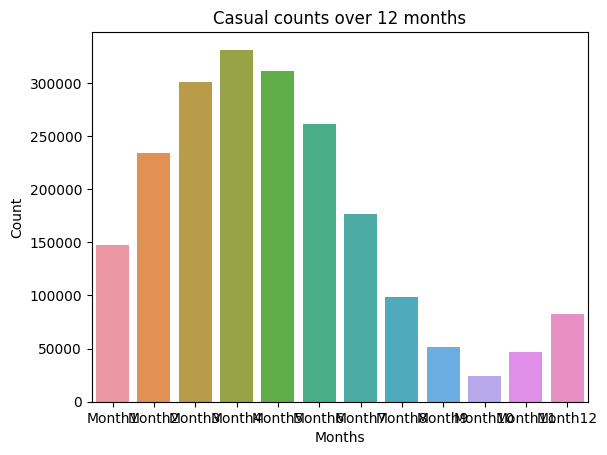

In [18]:
filtered_df = df_reset[df_reset['member_casual'] == 'casual']
prepared_df = filtered_df[['level_0', 'Count']]

# Assuming 'prepared_df' is already defined and loaded
sb.barplot(x='level_0', y='Count', data=prepared_df)

# Adding labels and title
plt.xlabel('Months')  # Change 'Category' to your actual x-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Casual counts over 12 months')  # Title of the plot

plt.show()

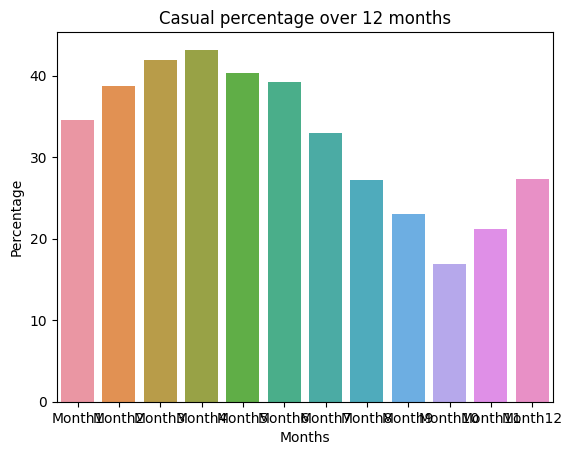

In [19]:
filtered_df = df_reset[df_reset['member_casual'] == 'casual']
prepared_df = filtered_df[['level_0', 'Percentage']]

# Assuming 'prepared_df' is already defined and loaded
sb.barplot(x='level_0', y='Percentage', data=prepared_df)

# Adding labels and title
plt.xlabel('Months')  # Change 'Category' to your actual x-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.title('Casual percentage over 12 months')  # Title of the plot

plt.show()

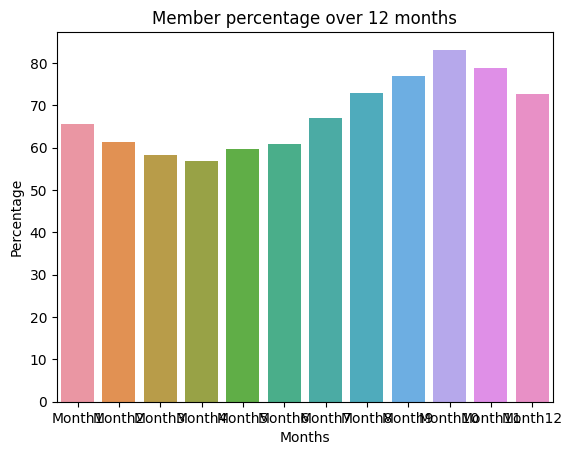

In [20]:
filtered_df = df_reset[df_reset['member_casual'] == 'member']
prepared_df = filtered_df[['level_0', 'Percentage']]
# Assuming 'prepared_df' is already defined and loaded
sb.barplot(x='level_0', y='Percentage', data=prepared_df)

# Adding labels and title
plt.xlabel('Months')  # Change 'Category' to your actual x-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.title('Member percentage over 12 months')  # Title of the plot

plt.show()

From these aggregate bar graphs, it can be observed that the percentage of casual riders is at its highest in months 3-5, which refers to the months of June to Aug 2023, at over 40%. 
This could either be a seasonal increase due to the summer months or due to marketing efforts during that period of time, or both. 
With this surge in casual ridership during this period, it is the best time to focus the efforts of converting them to members. 

# Data Cleaning

Looking through the data on kaggle, the **start station and end station columns** are abit confusing because there are many nil rows (15% are null). The rest of the columns have no null rows. 

This analysis is using a dataset with only 12 months, which might not give a very insightful data for longer term analysis. 

# Data Augmentation
Adding a new column for ride_length and day_of_wk 

In [21]:
df = pd.read_csv('/kaggle/input/cyclists/202403-divvy-tripdata/202403-divvy-tripdata.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301687 entries, 0 to 301686
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             301687 non-null  object 
 1   rideable_type       301687 non-null  object 
 2   started_at          301687 non-null  object 
 3   ended_at            301687 non-null  object 
 4   start_station_name  257432 non-null  object 
 5   start_station_id    257432 non-null  object 
 6   end_station_name    254547 non-null  object 
 7   end_station_id      254547 non-null  object 
 8   start_lat           301687 non-null  float64
 9   start_lng           301687 non-null  float64
 10  end_lat             301291 non-null  float64
 11  end_lng             301291 non-null  float64
 12  member_casual       301687 non-null  object 
dtypes: float64(4), object(9)
memory usage: 29.9+ MB


In [23]:
# Convert columns to datetime
df['Start'] = pd.to_datetime(df['started_at'])
df['End'] = pd.to_datetime(df['ended_at'])
# Calculate the difference
df['Duration'] = df['End'] - df['Start']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301687 entries, 0 to 301686
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             301687 non-null  object         
 1   rideable_type       301687 non-null  object         
 2   started_at          301687 non-null  object         
 3   ended_at            301687 non-null  object         
 4   start_station_name  257432 non-null  object         
 5   start_station_id    257432 non-null  object         
 6   end_station_name    254547 non-null  object         
 7   end_station_id      254547 non-null  object         
 8   start_lat           301687 non-null  float64        
 9   start_lng           301687 non-null  float64        
 10  end_lat             301291 non-null  float64        
 11  end_lng             301291 non-null  float64        
 12  member_casual       301687 non-null  object         
 13  Start         

In [24]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start,End,Duration
0,64FBE3BAED5F29E6,electric_bike,2024-03-05 18:33:11,2024-03-05 18:51:48,NaN,NaN,NaN,NaN,41.94,-87.65,41.96,-87.65,member,2024-03-05 18:33:11,2024-03-05 18:51:48,0 days 00:18:37
1,9991629435C5E20E,electric_bike,2024-03-06 17:15:14,2024-03-06 17:16:04,NaN,NaN,NaN,NaN,41.91,-87.64,41.91,-87.64,member,2024-03-06 17:15:14,2024-03-06 17:16:04,0 days 00:00:50
2,E5C9FECD5B71BEBD,electric_bike,2024-03-06 17:16:36,2024-03-06 17:19:28,NaN,NaN,NaN,NaN,41.91,-87.64,41.92,-87.64,member,2024-03-06 17:16:36,2024-03-06 17:19:28,0 days 00:02:52
3,4CEA3EC8906DAEA8,electric_bike,2024-03-03 22:55:54,2024-03-03 22:58:08,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.63,member,2024-03-03 22:55:54,2024-03-03 22:58:08,0 days 00:02:14
4,77266B408503C55F,electric_bike,2024-03-17 11:15:18,2024-03-17 11:31:18,NaN,NaN,NaN,NaN,41.93,-87.70,41.93,-87.72,member,2024-03-17 11:15:18,2024-03-17 11:31:18,0 days 00:16:00


In [25]:
df['DayOfWeek'] = df['Start'].dt.day_name()

In [26]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start,End,Duration,DayOfWeek
0,64FBE3BAED5F29E6,electric_bike,2024-03-05 18:33:11,2024-03-05 18:51:48,NaN,NaN,NaN,NaN,41.94,-87.65,41.96,-87.65,member,2024-03-05 18:33:11,2024-03-05 18:51:48,0 days 00:18:37,Tuesday
1,9991629435C5E20E,electric_bike,2024-03-06 17:15:14,2024-03-06 17:16:04,NaN,NaN,NaN,NaN,41.91,-87.64,41.91,-87.64,member,2024-03-06 17:15:14,2024-03-06 17:16:04,0 days 00:00:50,Wednesday
2,E5C9FECD5B71BEBD,electric_bike,2024-03-06 17:16:36,2024-03-06 17:19:28,NaN,NaN,NaN,NaN,41.91,-87.64,41.92,-87.64,member,2024-03-06 17:16:36,2024-03-06 17:19:28,0 days 00:02:52,Wednesday
3,4CEA3EC8906DAEA8,electric_bike,2024-03-03 22:55:54,2024-03-03 22:58:08,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.63,member,2024-03-03 22:55:54,2024-03-03 22:58:08,0 days 00:02:14,Sunday
4,77266B408503C55F,electric_bike,2024-03-17 11:15:18,2024-03-17 11:31:18,NaN,NaN,NaN,NaN,41.93,-87.70,41.93,-87.72,member,2024-03-17 11:15:18,2024-03-17 11:31:18,0 days 00:16:00,Sunday


In [27]:
df['Duration'].describe()

count                       301687
mean     0 days 00:15:31.348954379
std      0 days 01:02:08.383971526
min              -1 days +23:57:08
25%                0 days 00:04:59
50%                0 days 00:08:34
75%                0 days 00:15:09
max                1 days 01:59:56
Name: Duration, dtype: object

# Data cleaning part 2
## Upon closer inspection of the new columns, I discovered some interesting anomalies. 
1. There are negative or zero duration rows, which doesn't make any sense. The rows are shown below. The rows are removed from the df. 
2. There are some null values in the end lat and longitude columns, roughly 300 of them. 

In [28]:
df[df['Duration'] <= pd.Timedelta(0)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start,End,Duration,DayOfWeek
363,7E38BE8271CC61D1,electric_bike,2024-03-13 08:02:03,2024-03-13 08:02:03,NaN,NaN,NaN,NaN,41.880000,-87.650000,41.880000,-87.650000,member,2024-03-13 08:02:03,2024-03-13 08:02:03,0 days 00:00:00,Wednesday
2741,C03396DD31FD583C,electric_bike,2024-03-27 10:52:54,2024-03-27 10:52:53,NaN,NaN,NaN,NaN,42.060000,-87.680000,42.060000,-87.680000,casual,2024-03-27 10:52:54,2024-03-27 10:52:53,-1 days +23:59:59,Wednesday
3282,111CAFE72EEF15A1,electric_bike,2024-03-14 07:09:32,2024-03-14 07:09:31,NaN,NaN,NaN,NaN,42.060000,-87.680000,42.060000,-87.680000,casual,2024-03-14 07:09:32,2024-03-14 07:09:31,-1 days +23:59:59,Thursday
3516,84CDEF0748B4B557,electric_bike,2024-03-13 00:56:51,2024-03-13 00:56:51,NaN,NaN,NaN,NaN,42.060000,-87.680000,42.060000,-87.680000,casual,2024-03-13 00:56:51,2024-03-13 00:56:51,0 days 00:00:00,Wednesday
3517,9C40368D2E4309EE,electric_bike,2024-03-13 00:57:56,2024-03-13 00:57:56,NaN,NaN,NaN,NaN,42.060000,-87.680000,42.060000,-87.680000,casual,2024-03-13 00:57:56,2024-03-13 00:57:56,0 days 00:00:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269549,9D8E2453ED8B8A76,electric_bike,2024-03-10 18:55:28,2024-03-10 18:55:28,Michigan Ave & Madison St,13036,Michigan Ave & Madison St,13036,41.881943,-87.625245,41.882134,-87.625125,member,2024-03-10 18:55:28,2024-03-10 18:55:28,0 days 00:00:00,Sunday
283888,DCC40BEA8D34AA8C,electric_bike,2024-03-13 14:47:04,2024-03-13 14:47:04,Racine Ave & Congress Pkwy,TA1306000025,Racine Ave & Congress Pkwy,TA1306000025,41.874587,-87.657006,41.874640,-87.657030,member,2024-03-13 14:47:04,2024-03-13 14:47:04,0 days 00:00:00,Wednesday
288166,C03B0FA7CFB2205D,classic_bike,2024-03-04 14:53:37,2024-03-04 14:53:37,Western Ave & Winnebago Ave,13068,Western Ave & Winnebago Ave,13068,41.915520,-87.687022,41.915520,-87.687022,casual,2024-03-04 14:53:37,2024-03-04 14:53:37,0 days 00:00:00,Monday
292897,7126A69843F755B7,classic_bike,2024-03-22 09:35:00,2024-03-22 09:35:00,Wells St & Elm St,KA1504000135,Wells St & Elm St,KA1504000135,41.903222,-87.634324,41.903222,-87.634324,casual,2024-03-22 09:35:00,2024-03-22 09:35:00,0 days 00:00:00,Friday


To further remove anomalies, I filter out rides that are less than 30 seconds long. 
Logically speaking, any ride less than 30 seconds are most likely faulty or a misclick. 
The number of rows dropped from 301,000 to 297,000, so approximately 4000 or 1% were anomalies. 

In [29]:
df = df[df['Duration'] > pd.Timedelta(seconds=30)]
df['Duration'].describe()

count                       297262
mean     0 days 00:15:45.013718537
std      0 days 01:02:34.336417260
min                0 days 00:00:31
25%                0 days 00:05:07
50%                0 days 00:08:41
75%                0 days 00:15:18
max                1 days 01:59:56
Name: Duration, dtype: object

# Creating a data cleaning and augmenting pipeline

In [30]:
def clean_cycdata(df):
    # Convert columns to datetime
    df['Start'] = pd.to_datetime(df['started_at'])
    df['End'] = pd.to_datetime(df['ended_at'])
    # Calculate the difference
    df['Duration'] = df['End'] - df['Start']
    # Add Day of Week column
    df['DayOfWeek'] = df['Start'].dt.day_name()
    # Remove duration anomalies
    df = df[df['Duration'] > pd.Timedelta(seconds=30)]
    return df

In [31]:
clean_df = clean_cycdata(df)

In [32]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297262 entries, 0 to 301686
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             297262 non-null  object         
 1   rideable_type       297262 non-null  object         
 2   started_at          297262 non-null  object         
 3   ended_at            297262 non-null  object         
 4   start_station_name  254318 non-null  object         
 5   start_station_id    254318 non-null  object         
 6   end_station_name    252165 non-null  object         
 7   end_station_id      252165 non-null  object         
 8   start_lat           297262 non-null  float64        
 9   start_lng           297262 non-null  float64        
 10  end_lat             296866 non-null  float64        
 11  end_lng             296866 non-null  float64        
 12  member_casual       297262 non-null  object         
 13  Start              

In [33]:
clean_df.describe()

,start_lat,start_lng,end_lat,end_lng,Start,End,Duration
count,297262.000000,297262.000000,296866.000000,296866.000000,297262,297262,297262
mean,41.900194,-87.646705,41.900603,-87.646906,2024-03-16 01:24:14.154298112,2024-03-16 01:39:59.168015872,0 days 00:15:45.013718537
min,41.648501,-87.841110,41.630000,-87.870000,2024-03-01 00:00:43,2024-03-01 00:03:33,0 days 00:00:31
25%,41.880000,-87.660000,41.880000,-87.660274,2024-03-07 20:34:55,2024-03-07 20:49:23.249999872,0 days 00:05:07
50%,41.895634,-87.643320,41.895769,-87.643353,2024-03-15 15:43:53,2024-03-15 16:00:24,0 days 00:08:41
75%,41.928773,-87.629912,41.929143,-87.629912,2024-03-23 20:26:02,2024-03-23 20:40:52.500000,0 days 00:15:18
max,42.070000,-87.528232,42.080000,-87.528232,2024-03-31 23:59:11,2024-04-01 02:35:26,1 days 01:59:56
std,0.045645,0.027135,0.045780,0.027300,NaN,NaN,0 days 01:02:34.336417260


# Export this clean data to a visualisation tool like Tableau

In [34]:
#clean_df.to_csv('clean_2024-03')

### Realise that this data cannot be used in tableau

# Data Exploration part 2 
### Looked at the most common days people ride
Most people run on the saturday, followed by Tuesday, Monday and Wednesday. 

In [35]:
clean_df['DayOfWeek'].value_counts().head(7)

DayOfWeek
Saturday     51805
Tuesday      43959
Monday       42582
Wednesday    42080
Sunday       40456
Thursday     38656
Friday       37724
Name: count, dtype: int64

# Data Exploration Part 3
### Creating Pivot tables to find patterns

In [36]:
clean_df.pivot_table(index=['member_casual'],
                    values=['Duration'],
                    aggfunc='mean')

,Duration
member_casual,
casual,0 days 00:25:21.142213578
member,0 days 00:12:08.332777824


Casual members ride much longer durations than members

In [37]:
clean_df.pivot_table(index=['DayOfWeek'],
                    values=['Duration'],
                    aggfunc='mean').sort_values('Duration')

,Duration
DayOfWeek,
Wednesday,0 days 00:12:58.899524714
Thursday,0 days 00:13:22.445674668
Friday,0 days 00:14:15.920528045
Tuesday,0 days 00:14:39.886758115
Monday,0 days 00:15:01.423770607
Saturday,0 days 00:19:20.740526976
Sunday,0 days 00:19:37.500444927


People have the shortest rides on Wednesday and the longest on the weekends. Weekend rides are considerably longer by 4 minutes on average. 

In [38]:
clean_df.pivot_table(index=['DayOfWeek'],
                    values=['ride_id'],
                    aggfunc='count').sort_values('ride_id')

,ride_id
DayOfWeek,
Friday,37724
Thursday,38656
Sunday,40456
Wednesday,42080
Monday,42582
Tuesday,43959
Saturday,51805


Same result as the value_count function used above. 

# Exploring the dataset at a different month
### Check if there are any seasonal differences 
Starting with Feb then Jan, comparing it with March above

In [39]:
df = pd.read_csv('/kaggle/input/cyclists/202402-divvy-tripdata/202402-divvy-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223164 entries, 0 to 223163
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             223164 non-null  object 
 1   rideable_type       223164 non-null  object 
 2   started_at          223164 non-null  object 
 3   ended_at            223164 non-null  object 
 4   start_station_name  199746 non-null  object 
 5   start_station_id    199746 non-null  object 
 6   end_station_name    198013 non-null  object 
 7   end_station_id      198013 non-null  object 
 8   start_lat           223164 non-null  float64
 9   start_lng           223164 non-null  float64
 10  end_lat             222846 non-null  float64
 11  end_lng             222846 non-null  float64
 12  member_casual       223164 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.1+ MB


In [40]:
clean_df = clean_cycdata(df)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220636 entries, 0 to 223163
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             220636 non-null  object         
 1   rideable_type       220636 non-null  object         
 2   started_at          220636 non-null  object         
 3   ended_at            220636 non-null  object         
 4   start_station_name  197865 non-null  object         
 5   start_station_id    197865 non-null  object         
 6   end_station_name    196410 non-null  object         
 7   end_station_id      196410 non-null  object         
 8   start_lat           220636 non-null  float64        
 9   start_lng           220636 non-null  float64        
 10  end_lat             220318 non-null  float64        
 11  end_lng             220318 non-null  float64        
 12  member_casual       220636 non-null  object         
 13  Start              

In [41]:
clean_df.describe()

,start_lat,start_lng,end_lat,end_lng,Start,End,Duration
count,220636.000000,220636.000000,220318.000000,220318.000000,220636,220636,220636
mean,41.899132,-87.647208,41.899373,-87.647267,2024-02-16 09:21:24.589192448,2024-02-16 09:37:05.586060288,0 days 00:15:40.996868144
min,41.648501,-87.844110,41.648501,-87.870000,2024-02-01 00:01:50,2024-02-01 00:08:07,0 days 00:00:31
25%,41.879319,-87.661364,41.879356,-87.661364,2024-02-08 18:23:12.500000,2024-02-08 18:39:29.249999872,0 days 00:05:01
50%,41.894731,-87.644131,41.895501,-87.644140,2024-02-16 12:56:07,2024-02-16 13:08:36,0 days 00:08:21
75%,41.928887,-87.630000,41.929143,-87.630000,2024-02-23 14:22:12.500000,2024-02-23 14:36:42.750000128,0 days 00:14:18
max,42.070000,-87.528232,42.080000,-87.530000,2024-02-29 23:59:15,2024-03-01 23:51:12,1 days 01:00:29
std,0.047934,0.027522,0.048042,0.027534,NaN,NaN,0 days 01:09:08.596784361


Mean value of duration in Feb is quite similar to March

In [42]:
clean_df['DayOfWeek'].value_counts().head(7)

DayOfWeek
Thursday     43340
Tuesday      38428
Wednesday    35075
Monday       31781
Friday       28956
Sunday       23854
Saturday     19202
Name: count, dtype: int64

The popular day of the week is completely different from that in March. 
In March: Saturday was most popular, followed by Tuesday 

In [43]:
clean_df.pivot_table(index=['member_casual'],
                    values=['Duration'],
                    aggfunc='mean')

,Duration
member_casual,
casual,0 days 00:25:30.493182159
member,0 days 00:13:03.286022048


Similar result to the month of March

In [44]:
clean_df.pivot_table(index=['DayOfWeek'],
                    values=['Duration'],
                    aggfunc='mean').sort_values('Duration')

,Duration
DayOfWeek,
Thursday,0 days 00:14:04.863520996
Wednesday,0 days 00:14:07.990135424
Monday,0 days 00:15:07.973317390
Friday,0 days 00:15:28.319553805
Tuesday,0 days 00:15:32.666206932
Saturday,0 days 00:18:47.492865326
Sunday,0 days 00:19:35.098935189


Similar to March, Weekends are the most popular

In [45]:
df = pd.read_csv('/kaggle/input/cyclists/202401-divvy-tripdata/202401-divvy-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144873 entries, 0 to 144872
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             144873 non-null  object 
 1   rideable_type       144873 non-null  object 
 2   started_at          144873 non-null  object 
 3   ended_at            144873 non-null  object 
 4   start_station_name  125708 non-null  object 
 5   start_station_id    125708 non-null  object 
 6   end_station_name    124124 non-null  object 
 7   end_station_id      124124 non-null  object 
 8   start_lat           144873 non-null  float64
 9   start_lng           144873 non-null  float64
 10  end_lat             144585 non-null  float64
 11  end_lng             144585 non-null  float64
 12  member_casual       144873 non-null  object 
dtypes: float64(4), object(9)
memory usage: 14.4+ MB


In [46]:
clean_df = clean_cycdata(df)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142209 entries, 0 to 144872
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             142209 non-null  object         
 1   rideable_type       142209 non-null  object         
 2   started_at          142209 non-null  object         
 3   ended_at            142209 non-null  object         
 4   start_station_name  123815 non-null  object         
 5   start_station_id    123815 non-null  object         
 6   end_station_name    122465 non-null  object         
 7   end_station_id      122465 non-null  object         
 8   start_lat           142209 non-null  float64        
 9   start_lng           142209 non-null  float64        
 10  end_lat             141921 non-null  float64        
 11  end_lng             141921 non-null  float64        
 12  member_casual       142209 non-null  object         
 13  Start              

In [47]:
clean_df.describe()

,start_lat,start_lng,end_lat,end_lng,Start,End,Duration
count,142209.000000,142209.000000,141921.000000,141921.000000,142209,142209,142209
mean,41.897564,-87.646661,41.897730,-87.646742,2024-01-16 07:23:21.259090432,2024-01-16 07:38:41.563135744,0 days 00:15:20.304045454
min,41.648588,-87.844084,41.630000,-87.860000,2024-01-01 00:00:39,2024-01-01 00:04:20,0 days 00:00:31
25%,41.879255,-87.660285,41.879255,-87.660285,2024-01-06 18:42:51,2024-01-06 18:56:54,0 days 00:04:34
50%,41.894345,-87.643391,41.894345,-87.643353,2024-01-13 16:07:04,2024-01-13 16:15:36,0 days 00:07:21
75%,41.925858,-87.630000,41.926277,-87.630000,2024-01-25 23:39:25,2024-01-26 00:00:52,0 days 00:12:08
max,42.070000,-87.528431,42.070000,-87.460000,2024-01-31 23:59:40,2024-02-02 00:01:21,1 days 00:59:57
std,0.048805,0.027470,0.048860,0.027485,NaN,NaN,0 days 01:21:21.284939451


In [48]:
clean_df['DayOfWeek'].value_counts().head(7)

DayOfWeek
Wednesday    30511
Thursday     26570
Monday       23448
Tuesday      22008
Friday       16560
Saturday     11937
Sunday       11175
Name: count, dtype: int64

In [49]:
pt = clean_df.pivot_table(index=['member_casual', 'DayOfWeek'],
                    values=['Duration'],
                    aggfunc=['mean', 'median']).sort_values('DayOfWeek')

pt.head(20)

,,mean,median
,,Duration,Duration
member_casual,DayOfWeek,,
casual,Friday,0 days 00:18:40.753187316,0 days 00:07:44
member,Friday,0 days 00:11:52.500333308,0 days 00:07:05
casual,Monday,0 days 00:27:02.162697417,0 days 00:07:47
member,Monday,0 days 00:13:46.496171437,0 days 00:07:17
casual,Saturday,0 days 00:23:38.211102106,0 days 00:08:23
member,Saturday,0 days 00:13:49.938641884,0 days 00:07:31
casual,Sunday,0 days 00:20:44.134590655,0 days 00:07:56
member,Sunday,0 days 00:15:35.462225740,0 days 00:07:12


In [50]:
clean_df.pivot_table(index=['DayOfWeek'],
                    values=['Duration'],
                    aggfunc='mean').sort_values('Duration')

,Duration
DayOfWeek,
Friday,0 days 00:13:07.913707729
Thursday,0 days 00:13:17.566127211
Saturday,0 days 00:15:51.565217391
Monday,0 days 00:16:01.855851245
Tuesday,0 days 00:16:10.814113049
Wednesday,0 days 00:16:29.292550227
Sunday,0 days 00:16:39.903624161


Interesting result as wednesday is not normally one of the days with long durations. Usually its the weekends
### Overall, the 3 months actually differ quite a lot in their pivot tables. 

# Final Analysis with combined dataset

In [51]:
'''import numpy as np
import pandas as pd
import seaborn as sb'''

'import numpy as np\nimport pandas as pd\nimport seaborn as sb'

In [52]:
'''def clean_cycdata(df):
    # Convert columns to datetime
    df['Start'] = pd.to_datetime(df['started_at'])
    df['End'] = pd.to_datetime(df['ended_at'])
    # Calculate the difference
    df['Duration'] = df['End'] - df['Start']
    # Add Day of Week column
    df['DayOfWeek'] = df['Start'].dt.day_name()
    # Remove duration anomalies
    df = df[df['Duration'] > pd.Timedelta(seconds=30)]
    return df'''

"def clean_cycdata(df):\n    # Convert columns to datetime\n    df['Start'] = pd.to_datetime(df['started_at'])\n    df['End'] = pd.to_datetime(df['ended_at'])\n    # Calculate the difference\n    df['Duration'] = df['End'] - df['Start']\n    # Add Day of Week column\n    df['DayOfWeek'] = df['Start'].dt.day_name()\n    # Remove duration anomalies\n    df = df[df['Duration'] > pd.Timedelta(seconds=30)]\n    return df"

In [53]:
'''list_of_dfs = []  

for x in range(4,10):
    df = pd.read_csv(f"/kaggle/input/cyclists/20230{x}-divvy-tripdata/20230{x}-divvy-tripdata.csv")
    df = clean_cycdata(df)
    list_of_dfs.append(df)
for x in range(10,13):
    df = pd.read_csv(f"/kaggle/input/cyclists/2023{x}-divvy-tripdata/2023{x}-divvy-tripdata.csv")
    df = clean_cycdata(df)
    list_of_dfs.append(df)
for x in range(1,4):
    df = pd.read_csv(f"/kaggle/input/cyclists/20240{x}-divvy-tripdata/20240{x}-divvy-tripdata.csv")
    df = clean_cycdata(df)
    list_of_dfs.append(df)
    
# Concatenate all statistics DataFrames
combined_df = pd.concat(list_of_dfs, keys=[f'Month{i+1}' for i in range(len(list_of_dfs))])'''

'list_of_dfs = []  \n\nfor x in range(4,10):\n    df = pd.read_csv(f"/kaggle/input/cyclists/20230{x}-divvy-tripdata/20230{x}-divvy-tripdata.csv")\n    df = clean_cycdata(df)\n    list_of_dfs.append(df)\nfor x in range(10,13):\n    df = pd.read_csv(f"/kaggle/input/cyclists/2023{x}-divvy-tripdata/2023{x}-divvy-tripdata.csv")\n    df = clean_cycdata(df)\n    list_of_dfs.append(df)\nfor x in range(1,4):\n    df = pd.read_csv(f"/kaggle/input/cyclists/20240{x}-divvy-tripdata/20240{x}-divvy-tripdata.csv")\n    df = clean_cycdata(df)\n    list_of_dfs.append(df)\n    \n# Concatenate all statistics DataFrames\ncombined_df = pd.concat(list_of_dfs, keys=[f\'Month{i+1}\' for i in range(len(list_of_dfs))])'

In [54]:
#combined_df.info()

In [55]:
#month1_data = combined_df.loc['Month12']
#month1_data.info()

In [56]:
#combined_df.to_csv('combined_clean')

In [57]:
#combined_df.head()

In [58]:
#final_df = pd.read_csv("/kaggle/input/combined-clean-cycle/combined_clean.csv")

In [59]:
#final_df.info()

In [60]:
'''final_df.pivot_table(index=['member_casual'],
                    values=['Duration'],
                    aggfunc='mean')'''

"final_df.pivot_table(index=['member_casual'],\n                    values=['Duration'],\n                    aggfunc='mean')"

## Unfortunately, the combined 12 month data set is too big to analyse (5.5 million rows). The pivot_table takes very long to calculate

## We will try to visualise the monthly analysis 

In [61]:
df = pd.read_csv('/kaggle/input/cyclists/202403-divvy-tripdata/202403-divvy-tripdata.csv')

In [62]:
clean_df = clean_cycdata(df)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297262 entries, 0 to 301686
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             297262 non-null  object         
 1   rideable_type       297262 non-null  object         
 2   started_at          297262 non-null  object         
 3   ended_at            297262 non-null  object         
 4   start_station_name  254318 non-null  object         
 5   start_station_id    254318 non-null  object         
 6   end_station_name    252165 non-null  object         
 7   end_station_id      252165 non-null  object         
 8   start_lat           297262 non-null  float64        
 9   start_lng           297262 non-null  float64        
 10  end_lat             296866 non-null  float64        
 11  end_lng             296866 non-null  float64        
 12  member_casual       297262 non-null  object         
 13  Start              

In [63]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming 'clean_df' is your initial DataFrame
# Create the pivot table
pt = clean_df.pivot_table(index=['member_casual', 'DayOfWeek'],
                          values=['Duration'],
                          aggfunc=['mean', 'median'])

# Change Meam Duration from timedelta type to numeric for plotting
pt[('mean', 'Duration')] = pt[('mean', 'Duration')].dt.total_seconds()

# Flatten the columns for easier referencing
pt.columns = ['_'.join(col).strip() for col in pt.columns.values]

# Reset the index to make 'member_casual' and 'DayOfWeek' regular columns
pt = pt.reset_index()

pt.head(20)

,member_casual,DayOfWeek,mean_Duration,median_Duration
0,casual,Friday,1384.743421,0 days 00:09:52
1,casual,Monday,1470.477130,0 days 00:10:50
2,casual,Saturday,1738.868301,0 days 00:13:15
3,casual,Sunday,1826.045414,0 days 00:13:45
4,casual,Thursday,1205.129887,0 days 00:08:51
5,casual,Tuesday,1415.346826,0 days 00:10:02
6,casual,Wednesday,1161.822621,0 days 00:09:08
7,member,Friday,676.014033,0 days 00:07:30
8,member,Monday,722.454961,0 days 00:07:56
9,member,Saturday,806.981518,0 days 00:08:52


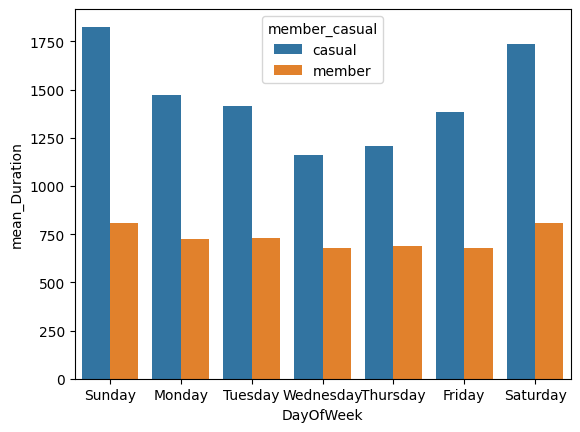

In [64]:
# Define the order of the days starting with Sunday
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Convert 'DayOfWeek' to a categorical type with the specified order
pt['DayOfWeek'] = pd.Categorical(pt['DayOfWeek'], categories=days, ordered=True)

# Sort the DataFrame by 'DayOfWeek' (now that it's categorical with a logical order, this will work)
pt = pt.sort_values('DayOfWeek')

# Plotting
sb.barplot(data=pt, x='DayOfWeek', y='mean_Duration', hue='member_casual')
plt.show()

In [65]:
pt = clean_df.pivot_table(index=['DayOfWeek', 'member_casual'],
                    values=['ride_id'],
                    aggfunc='count')

In [66]:
pt = pt.reset_index()
pt = pt.rename(columns={'ride_id': 'ride_count'})

In [67]:
# Define the order of the days starting with Sunday
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Convert 'DayOfWeek' to a categorical type with the specified order
pt['DayOfWeek'] = pd.Categorical(pt['DayOfWeek'], categories=days, ordered=True)
pt = pt.sort_values('DayOfWeek')
pt.head(20)

,DayOfWeek,member_casual,ride_count
6,Sunday,casual,14643
7,Sunday,member,25813
2,Monday,casual,10188
3,Monday,member,32394
10,Tuesday,casual,9734
11,Tuesday,member,34225
12,Wednesday,casual,8868
13,Wednesday,member,33212
8,Thursday,casual,8569
9,Thursday,member,30087


<Axes: xlabel='DayOfWeek', ylabel='ride_count'>

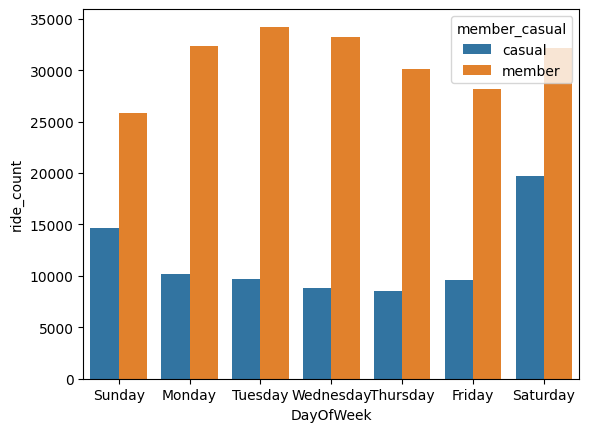

In [68]:
# Plotting
sb.barplot(data=pt, x='DayOfWeek', y='ride_count', hue='member_casual')

In [69]:
pt.to_csv('ride_counts.csv')